<a href="https://colab.research.google.com/github/RihaChri/RandomForestDiabetes/blob/main/RandomForest_Diabates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results of train set:
------------  --------------  ---------------
              Predicted True  Predicted False
Actual True   206             0
Actual False  0               370
------------  --------------  ---------------
Accuracy Train set:1.0
----------------------------------------
----------------------------------------
Results of test set:
------------  --------------  ---------------
              Predicted True  Predicted False
Actual True   35              27
Actual False  15              115
------------  --------------  ---------------
Accuracy Test set:0.78125


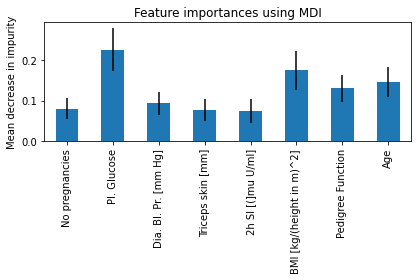

In [1]:
#Data is obtained from https://www.openml.org/d/37
#The set contains data of 768 patients with 8 attributes
#binary classification problem: Diabetes yes or no?
#1. Number of times pregnant
#2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#3. Diastolic blood pressure (mm Hg)
#4. Triceps skin fold thickness (mm)
#5. 2-Hour serum insulin (mu U/ml)
#6. Body mass index (weight in kg/(height in m)^2)
#7. Diabetes pedigree function
#8. Age (years)
#9. Class variable (0 or 1)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

#Importing data
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RandomForest-Diabetes/dataset_37_diabetes.csv")

X = data.iloc[:, 0:8].values
Y = data.iloc[:, 8].values

#split dataset
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#Training model
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)

#Confusion Matrix - Train Set
Y_Train_Pred = classifier.predict(X_Train)
trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(Y_Train, Y_Train_Pred).ravel()
print('Results of train set:')
print(tabulate([['', 'Predicted True', 'Predicted False'],   ['Actual True', truePositive, falseNegative]    , ['Actual False', falsePositive, trueNegative]    ]      ))
print('Accuracy Train set:'+str((truePositive+trueNegative)/(truePositive+trueNegative+falseNegative+falsePositive)))
print('----------------------------------------')
print('----------------------------------------')

#Predicting with test set
Y_Test_Pred = classifier.predict(X_Test)

#Confusion Matrix - Test Set
trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(Y_Test, Y_Test_Pred).ravel()
print('Results of test set:')
print(tabulate([['', 'Predicted True', 'Predicted False'],   ['Actual True', truePositive, falseNegative]    , ['Actual False', falsePositive, trueNegative]    ]      ))
print('Accuracy Test set:'+str((truePositive+trueNegative)/(truePositive+trueNegative+falseNegative+falsePositive)))



feature_names = ["No pregnancies", "Pl. Glucose", "Dia. Bl. Pr. [mm Hg]", "Triceps skin [mm]", "2h SI [(]mu U/ml]", "BMI [kg/(height in m)^2]", "Pedigree Function", "Age"]

importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)


forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()